# Frequenzanalyse - Anzahl Artikel 

In [150]:
#Import Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [151]:
#Abruf und Anzeige DataFrame
file_path = r'4_Daten_bereinigt.csv'
df = pd.read_csv(file_path)
print(df.head())

  Quelle       Datum                                               Link  \
0    FAZ  11/30/2023  https://www.faz.net/aktuell/wirtschaft/unterne...   
1    FAZ  11/30/2023  https://www.faz.net/aktuell/wirtschaft/kuenstl...   
2    FAZ  11/29/2023  https://www.faz.net/aktuell/feuilleton/medien/...   
3    FAZ  11/28/2023  https://www.faz.net/pro/d-economy/kuenstliche-...   
4    FAZ  11/28/2023  https://www.faz.net/pro/d-economy/prompt-der-w...   

                                               Titel  \
0  KI: Warum wir nicht mit Roboter-Autos vollauto...   
1  Microsoft: Sind Jahrzehnte von einer künstlich...   
2  Künstliche Intelligenz: Europa muss von neuen ...   
3  Was die Superintelligenz-KI anrichten könnte, ...   
4  Künstliche Intelligenz: Wie man sich seine Pro...   

                                                Text  Anzahl Woerter Text  \
0  Roboterautos faszinieren viele – die Augen der...                 1963   
1  Der Krieg von Mensch gegen Maschine verschiebt...      

In [159]:
#Datum in das Format Jahr.Monat umwandeln
df['Jahr.Monat'] = pd.to_datetime(df['Datum']).dt.to_period('M')

In [160]:
#Kategorisierung nach Zeitraum
def categorize_period(date):
    if date <= pd.Period('2022-11', 'M'):
        return '0. vor ChatGPT'
    elif pd.Period('2022-12', 'M') <= date <= pd.Period('2023-11', 'M'):
        return '1. ChatGPT-Jahr'
    elif pd.Period('2023-12', 'M') <= date <= pd.Period('2024-11', 'M'):
        return '2. ChatGPT-Jahr'
    return 'Andere'

df['Zeitraum'] = df['Jahr.Monat'].apply(categorize_period)

In [161]:
#Frequenz vor und nach Veröffentlichung ChatGPT

#Gruppieren nach Zeitraum und Berechnung der Statistiken
result = df.groupby('Zeitraum').agg(
    Number_of_Records=('Quelle', 'size'),
    Average_Records_Per_Month=('Quelle', 'size')  
).reset_index()

#Berechnung der durchschnittlichen Anzahl von Datensätzen pro Monat für jeden Zeitraum
result['Average_Records_Per_Month'] = result.apply(
    lambda x: x['Number_of_Records'] /5 if x['Zeitraum'] == '2. ChatGPT-Jahr' else x['Number_of_Records'] / 12,
    axis=1
)

#Konvertieren von 'Zeitraum' in einen String für die Anzeige
result['Zeitraum'] = result['Zeitraum'].astype(str)

#Anzeige des DataFrame
print("Zusammenfassung der Daten nach Zeitraum:")
print(result)


Zusammenfassung der Daten nach Zeitraum:
          Zeitraum  Number_of_Records  Average_Records_Per_Month
0   0. vor ChatGPT                155                  12.916667
1  1. ChatGPT-Jahr               1178                  98.166667
2  2. ChatGPT-Jahr                716                 143.200000


   Jahr.Monat  Number_of_Records
0     2021-12                 19
1     2022-01                 16
2     2022-02                  6
3     2022-03                 10
4     2022-04                  9
5     2022-05                 11
6     2022-06                 12
7     2022-07                 16
8     2022-08                  7
9     2022-09                 12
10    2022-10                 23
11    2022-11                 14
12    2022-12                 25
13    2023-01                 53
14    2023-02                 70
15    2023-03                123
16    2023-04                111
17    2023-05                132
18    2023-06                 91
19    2023-07                 96
20    2023-08                 65
21    2023-09                105
22    2023-10                109
23    2023-11                198
24    2023-12                103
25    2024-01                154
26    2024-02                161
27    2024-03                134
28    2024-04                164


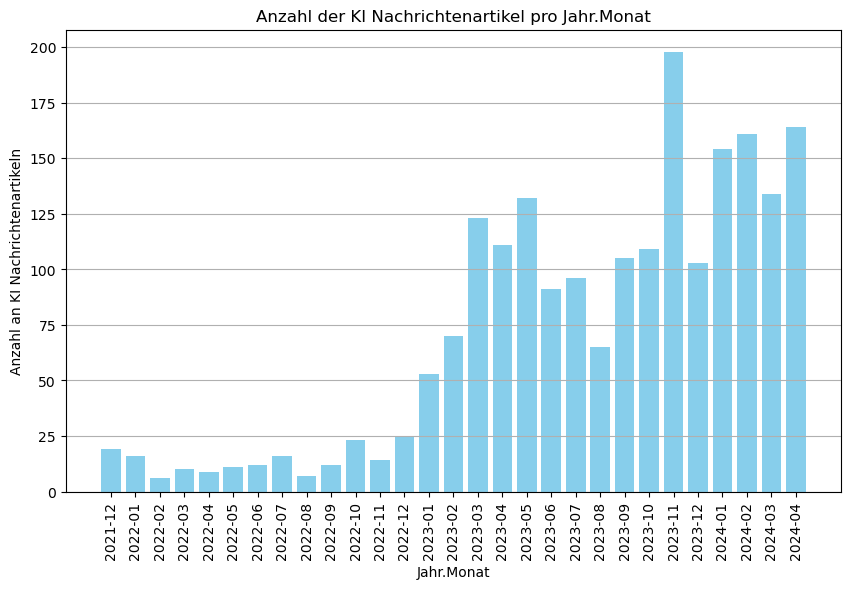

In [162]:
#Frequenz pro Monat

#Definition einer ganzen Reihe von Zeitraeumen von Minimum bis Maximum
period_range = pd.period_range(df['Jahr.Monat'].min(), df['Jahr.Monat'].max(), freq='M')

#Gruppieren nach 'Jahr.Monat' und Berechnen der erforderlichen Statistiken
result = df.groupby(['Jahr.Monat']).agg(
    Number_of_Records=('Quelle', 'size'),  #Zaehlen der Datensaetze
).reset_index()

print(result)

#Konvertieren von 'Jahr.Monat' in einen String, falls noch nicht geschehen, um sicherzustellen, dass er korrekt dargestellt wird
result['Jahr.Monat'] = result['Jahr.Monat'].astype(str)

#Erstellen eines vertikalen Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(result['Jahr.Monat'], result['Number_of_Records'], color='skyblue')
plt.ylabel('Anzahl an KI Nachrichtenartikeln')
plt.xlabel('Jahr.Monat')
plt.title('Anzahl der KI Nachrichtenartikel pro Jahr.Monat')
plt.grid(axis='y')

#Drehen der x-Achsenbeschriftung um 90 Grad
plt.xticks(rotation=90)

#Anzeige der Grafik
plt.show()

# Konvertierung des 'Datum' in das Format Jahr.Monat
df['Jahr.Monat'] = pd.to_datetime(df['Datum']).dt.to_period('M')

         Quelle  Number_of_Records
0           FAZ                590
7          Zeit                326
2           RND                263
3       Spiegel                250
4  Sueddeutsche                235
1         Focus                192
5  Tagesspiegel                135
6        Watson                 58


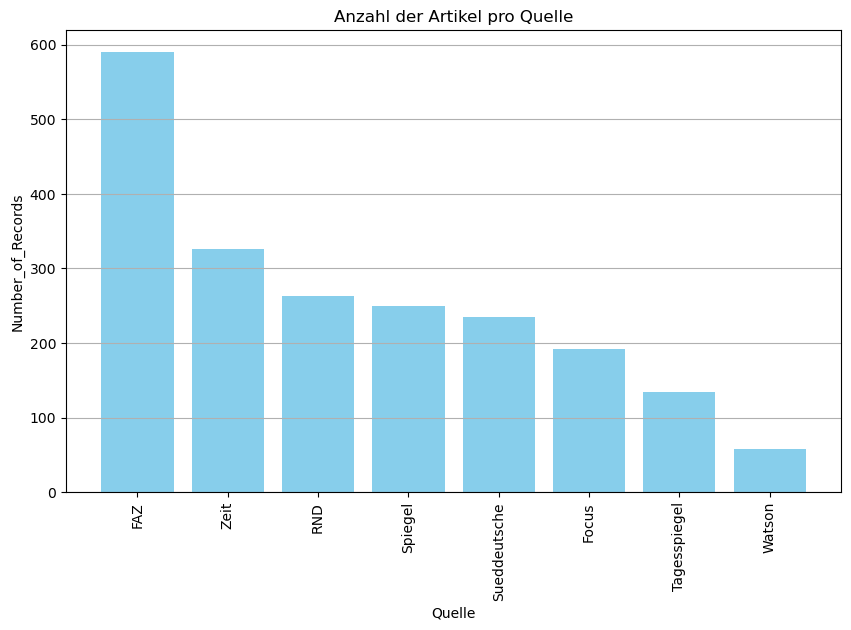

In [163]:
#Frequenz pro Nachrichtenseite

#Gruppieren nach 'Quelle' und Berechnen der erforderlichen Statistiken
result = df.groupby(['Quelle']).agg(
    Number_of_Records=('Quelle', 'size'),  #Zählen der Datensätze
).reset_index()

#Ergebnis nach 'Anzahl_der_Datensätze' sortieren
result = result.sort_values(by='Number_of_Records', ascending=False)

print(result)

#Erstellen eines vertikalen Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(result['Quelle'], result['Number_of_Records'], color='skyblue')
plt.ylabel('Number_of_Records')
plt.xlabel('Quelle')
plt.title('Anzahl der Artikel pro Quelle')
plt.grid(axis='y')

#Drehen der x-Achsenbeschriftung um 90 Grad
plt.xticks(rotation=90)

#Anzeige der Grafik
plt.show()

In [164]:
#Frequenz pro Nachrichtenseite vor und nach ChatGPT

#Gruppierung nach "Quelle" und "Jahr.Monat", dann Berechnung der erforderlichen Statistiken
result = df.groupby(['Quelle', 'Zeitraum']).agg(
    Number_of_Records=('Quelle', 'size'),  #Zaehlen der Datensaetze
).reset_index()

#Berechnung der durchschnittlichen Anzahl von Datensätzen pro Monat für jeden Zeitraum
result['Average_Records_Per_Month'] = result.apply(
    lambda x: x['Number_of_Records'] /5 if x['Zeitraum'] == '2. ChatGPT-Jahr' else x['Number_of_Records'] / 12,
    axis=1
)

#Sortieren Sie das Ergebnis nach "Quelle" und dann "Jahr.Monat"
result = result.sort_values(by=['Quelle','Zeitraum'])

print(result)

          Quelle         Zeitraum  Number_of_Records  \
0            FAZ   0. vor ChatGPT                 29   
1            FAZ  1. ChatGPT-Jahr                313   
2            FAZ  2. ChatGPT-Jahr                248   
3          Focus   0. vor ChatGPT                 13   
4          Focus  1. ChatGPT-Jahr                 89   
5          Focus  2. ChatGPT-Jahr                 90   
6            RND   0. vor ChatGPT                 21   
7            RND  1. ChatGPT-Jahr                157   
8            RND  2. ChatGPT-Jahr                 85   
9        Spiegel   0. vor ChatGPT                 22   
10       Spiegel  1. ChatGPT-Jahr                176   
11       Spiegel  2. ChatGPT-Jahr                 52   
12  Sueddeutsche   0. vor ChatGPT                 31   
13  Sueddeutsche  1. ChatGPT-Jahr                123   
14  Sueddeutsche  2. ChatGPT-Jahr                 81   
15  Tagesspiegel   0. vor ChatGPT                 12   
16  Tagesspiegel  1. ChatGPT-Jahr               